# MNIST Digit Classification with our own Framework

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

### Reading the Dataset

This code download the dataset from the repository on the internet. You can also manually copy the dataset from `/data` directory of AI Curriculum repo.

In [70]:
!rm *.pkl
!wget https://raw.githubusercontent.com/microsoft/AI-For-Beginners/main/data/mnist.pkl.gz
!gzip -d mnist.pkl.gz

zsh:1: command not found: wget
gzip: can't stat: mnist.pkl.gz (mnist.pkl.gz.gz): No such file or directory


In [1]:
import pickle
with open('mnist.pkl','rb') as f:
    pkl = pickle.load(f, encoding="latin1")
    MNIST = {
    'Train': {
        'Features': pkl[0][0],
        'Labels': pkl[0][1],
    },
    'Test': {
        'Features': pkl[1][0],
        'Labels': pkl[1][1],
    }
}

In [2]:
labels = MNIST['Train']['Labels']
data = MNIST['Train']['Features']

Let's see what is the shape of data that we have:

### Splitting the Data

We will use Scikit Learn to split the data between training and test dataset:

In [3]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(data,labels,test_size=0.2)

print(f"Train samples: {len(features_train)}, test samples: {len(features_test)}")

Train samples: 40000, test samples: 10000


### Instructions

1. Take the framework code from the lesson and paste it into this notebook, or (even better) into a separate Python module
1. Define and train one-layered perceptron, observing training and validation accuracy during training
1. Try to understand if overfitting took place, and adjust layer parameters to improve accuracy
1. Repeat previous steps for 2- and 3-layered perceptrons. Try to experiment with different activation functions between layers.
1. Try to answer the following questions:
    - Does the inter-layer activation function affect network performance?
    - Do we need 2- or 3-layered network for this task?
    - Did you experience any problems training the network? Especially as the number of layers increased.
    - How do weights of the network behave during training? You may plot max abs value of weights vs. epoch to understand the relation.

In [7]:
import importlib
import framework
importlib.reload(framework)
from framework import *

### One Layer Network

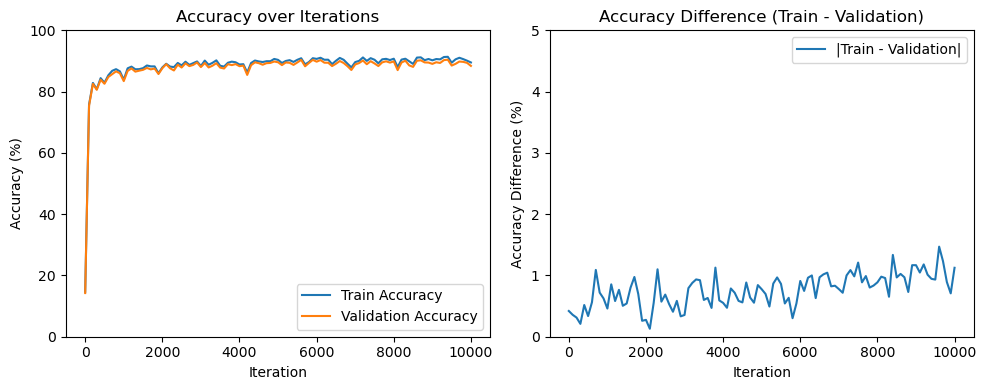

Final Validation Accuracy: 88.39%


In [8]:
one_layer_net = Net()
one_layer_net.add(Linear(784,10))
one_layer_net.add(Softmax())

history_one_layer_net = train_epoch(one_layer_net,features_train, labels_train, features_test, labels_test, monitor_acc=True)
plot_train_val_history(history_one_layer_net)




There isn't much difference between training accuracy and validation accuracy, hence no overfitting.<br> 
Let's try to artifiicaly overfit, using smaller batch size (more weights updates) and increased learning rate.

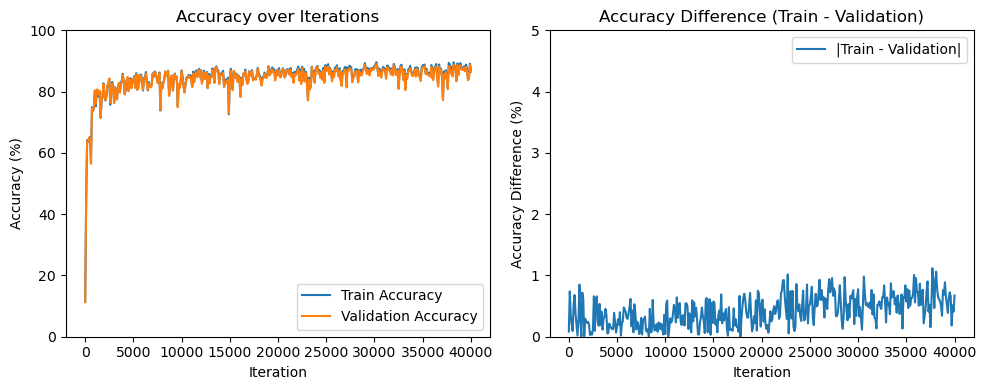

Final Validation Accuracy: 86.41%


In [81]:
one_layer_net = Net()
one_layer_net.add(Linear(784,10))
one_layer_net.add(Softmax())

history_one_layer_net_overfit = train_epoch(one_layer_net,features_train, labels_train, features_test, labels_test, lr=0.4, batch_size=1, monitor_acc=True)
plot_train_val_history(history_one_layer_net_overfit)

Still no overfitting.

### Two Layer Network

In [ ]:
#helper function
def gen_two_layer_network(layer_num_of_neurons, activation_function):
    net= Net()
    net.add(Linear(784, layer_num_of_neurons))
    net.add(activation_function)
    net.add(Linear(layer_num_of_neurons, 10))
    net.add(Softmax())
    return net

Comparing Hidden Layer of different sizes.

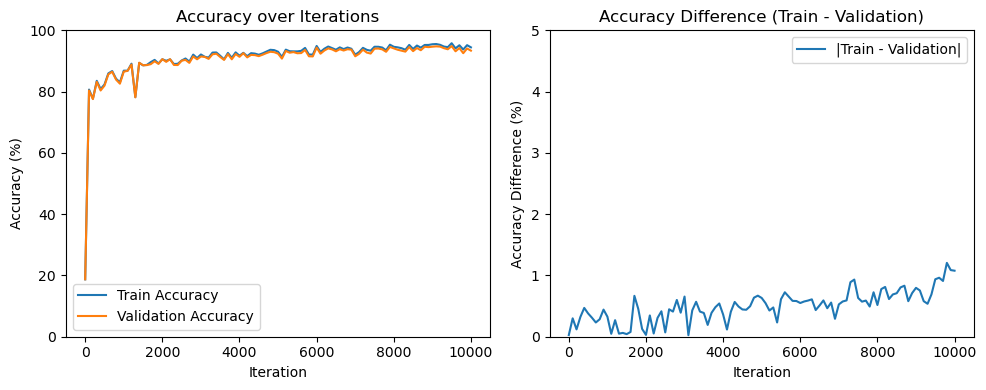

Final Validation Accuracy: 93.37%


In [82]:
two_layer_tanh_128 = gen_two_layer_network(128, Tanh())
history_two_layer_tanh_128 = train_epoch(two_layer_tanh_128,features_train, labels_train, features_test, labels_test, monitor_acc=True)
plot_train_val_history(history_two_layer_tanh_128)

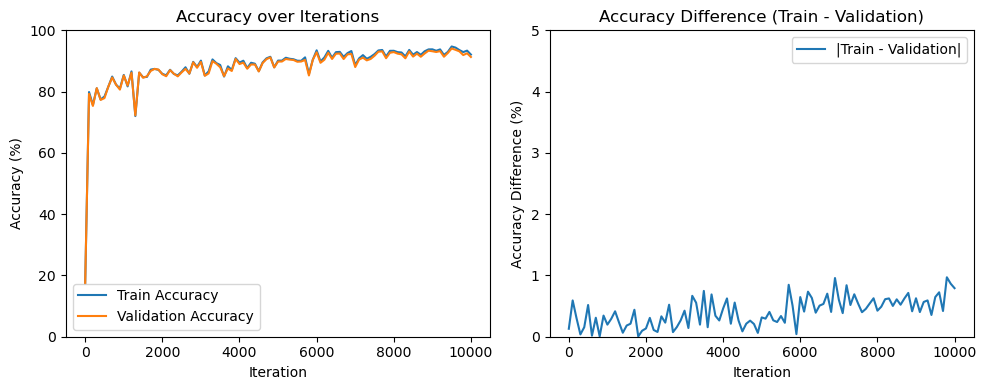

Final Validation Accuracy: 91.30%


In [90]:
two_layer_tanh_512 = gen_two_layer_network(512, Tanh())
history_two_layer_tanh_512 = train_epoch(two_layer_tanh_512,features_train, labels_train, features_test, labels_test, monitor_acc=True)
plot_train_val_history(history_two_layer_tanh_512)

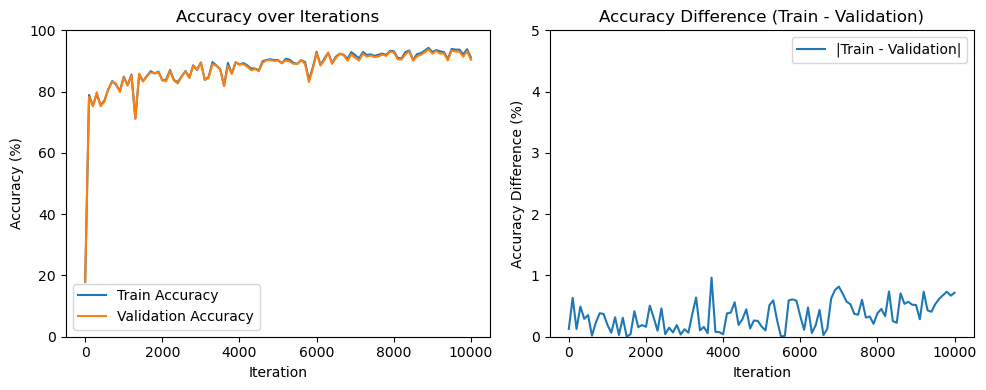

Final Validation Accuracy: 90.38%


In [89]:
two_layer_tanh_784 = gen_two_layer_network(784, Tanh())
history_two_layer_tanh_784 = train_epoch(two_layer_tanh_784,features_train, labels_train, features_test, labels_test, monitor_acc=True)
plot_train_val_history(history_two_layer_tanh_784)

Smal difference in accuracy (~4%) between 128 neurons and 784 neurons in hidden layer.<br>
Even though i tried to overfit with more neurons, the accuracy diffrence between validation and trainging stayed more or less the same. <br>
The accuracy with less neurons was actually better (compared 128, 512 and 784 in the layer).<br>

Comparing different activation functions:

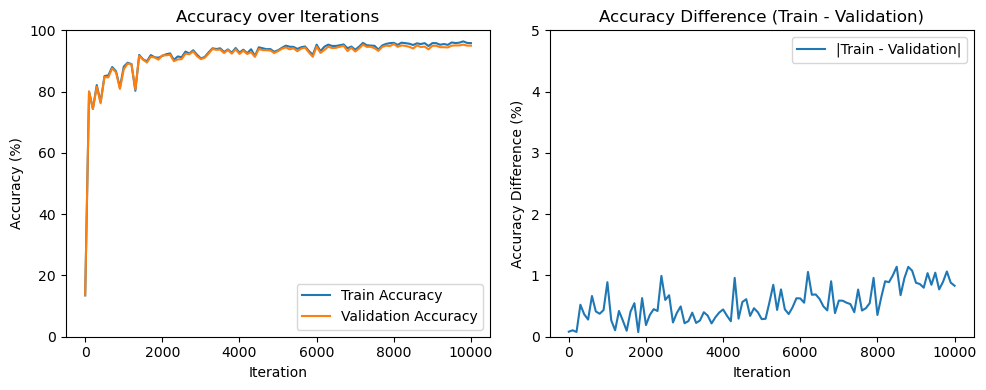

Final Validation Accuracy: 95.00%


In [88]:
two_layer_relu = gen_two_layer_network(128, ReLU())
history_two_layer_relu = train_epoch(two_layer_relu,features_train, labels_train, features_test, labels_test, monitor_acc=True)
plot_train_val_history(history_two_layer_relu)

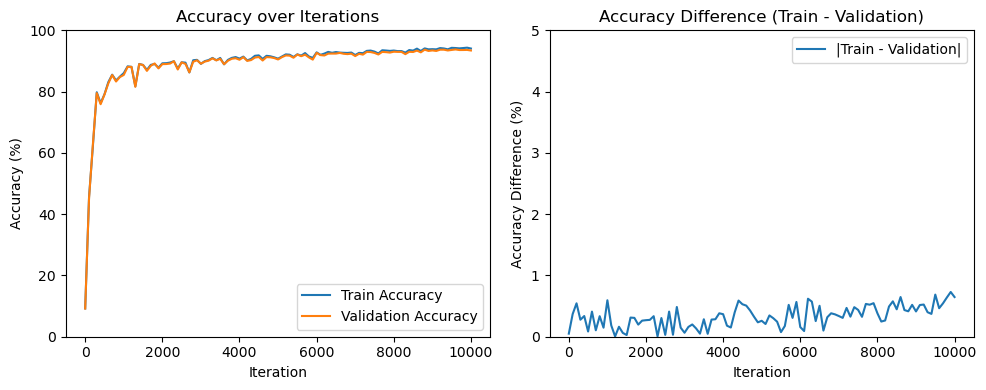

Final Validation Accuracy: 93.42%


In [87]:
two_layer_sigmoid = gen_two_layer_network(128, Sigmoid())
history_two_layer_sigmoid = train_epoch(two_layer_sigmoid,features_train, labels_train, features_test, labels_test, monitor_acc=True)
plot_train_val_history(history_two_layer_sigmoid)

ReLU activation function had the best performance and accuracy.

### Three Layer Network


In [5]:
#helper function
def gen_three_layer_network(layer_num_of_neurons, activation_function):
    net= Net()
    net.add(Linear(784, layer_num_of_neurons))
    net.add(activation_function)
    net.add(Linear(layer_num_of_neurons, layer_num_of_neurons))
    net.add(activation_function)
    net.add(Linear(layer_num_of_neurons, 10))
    net.add(Softmax())
    return net

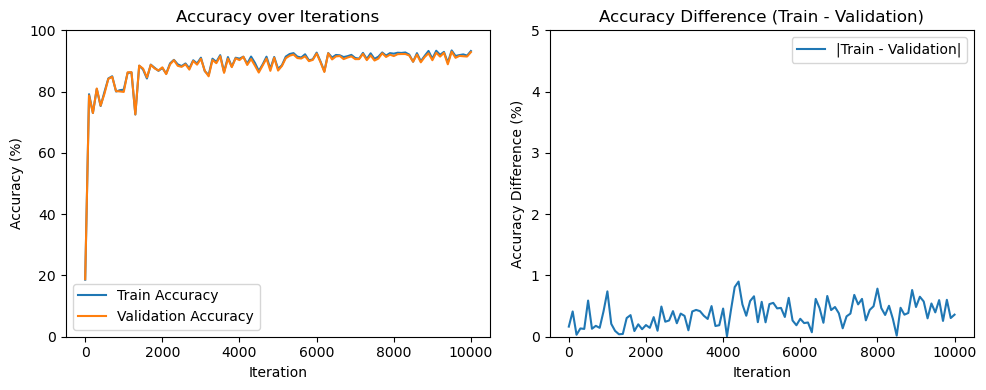

Final Validation Accuracy: 92.88%


In [85]:
three_layer_tanh_128 = gen_three_layer_network(128, Tanh())
history_three_layer_tanh_128 = train_epoch(three_layer_tanh_128,features_train, labels_train, features_test, labels_test, monitor_acc=True)
plot_train_val_history(history_three_layer_tanh_128)

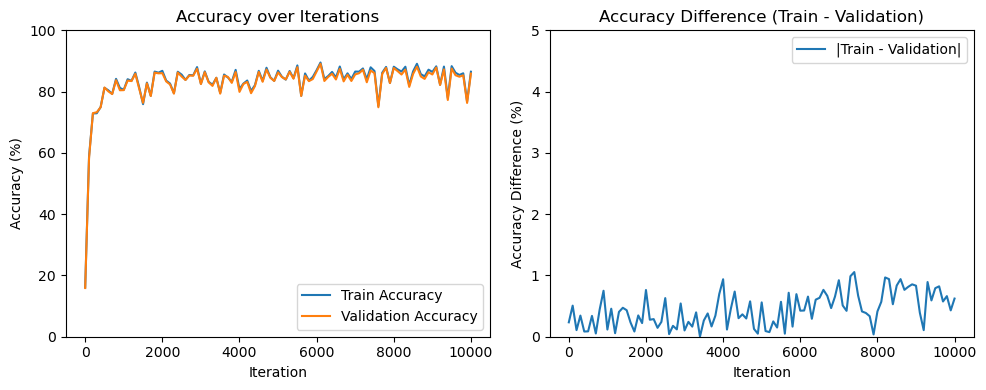

Final Validation Accuracy: 85.87%


In [6]:
three_layer_relu_128 = gen_three_layer_network(128, ReLU())
history_three_layer_relu_128 = train_epoch(three_layer_relu_128,features_train, labels_train, features_test, labels_test, monitor_acc=True)
plot_train_val_history(history_three_layer_relu_128)

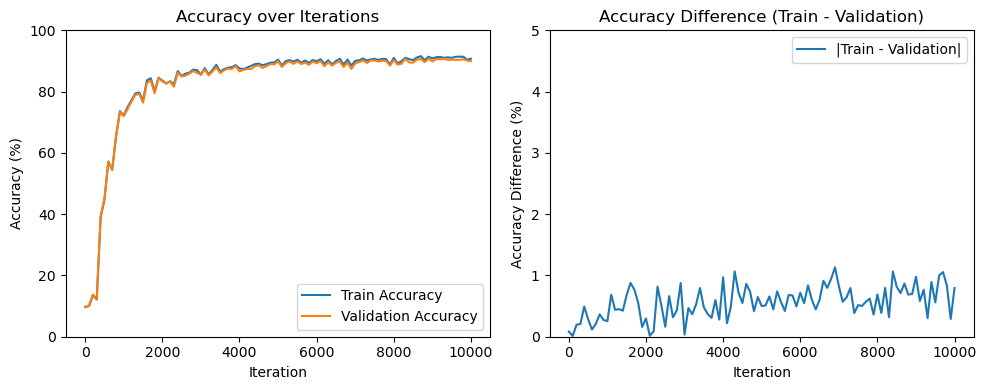

Final Validation Accuracy: 89.94%


In [10]:
three_layer_sigmoind_128 = gen_three_layer_network(128, Sigmoid())
history_three_layer_sigmoind_128 = train_epoch(three_layer_sigmoind_128,features_train, labels_train, features_test, labels_test, monitor_acc=True)
plot_train_val_history(history_three_layer_sigmoind_128)

3 layered network with RelU activation function performed much worse (75%) then 2 layered network with same parameters (95%).




## Conclusions

Inter-layer activation function affect network performance:<br>
- Two layeres networks showed little difference difference in performance with diffrent activation function (~94% acc).
- On 3 layers networks RelU activation perfromed worse (85% acc) than tanh and sigmoind activation function (~93% acc).

2 layers vs 3 layers:<br>
Diffrence depends on activaion function, but overall 2 layers perfromed better on all experminets.<br>
- Tanh activation with 128 neurons per layer: 93.3% (2 layers) > 92.8% (3 layers).
- Sigmoind activation with 128 neurons per layer: 93.4% (2 layers) > 91.3% (3 layers)
- RelU activation with 128 neurons per layer: 95% (2 layers) > 85% (3 layers)

It seems like 2 layers network was sufficient for this task (at least with perception model).<br>
It's important to note that there are much more parameter combinations that could be tested (different activation function in the same network, different number of neurons in each layers, learning rate, batch size, etc.)

Did you experience any problems training the network?<br>
- Runtime increased as we added more layers and the activation function was more complex.<br>



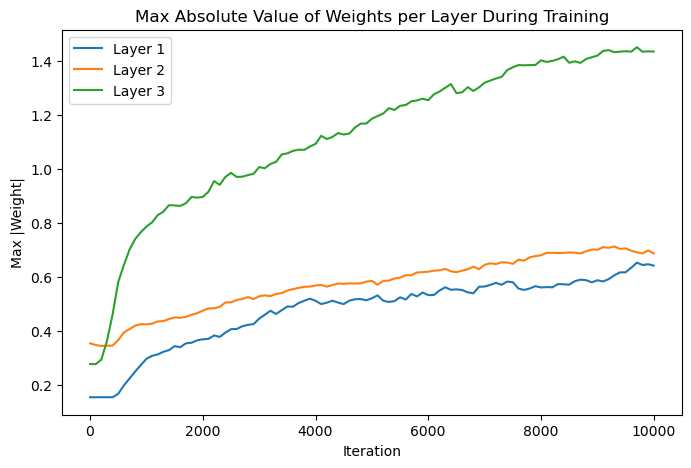

In [11]:
plot_weights_history(history_three_layer_sigmoind_128)

We can see that the max weight value changes relatively slow over time and in the same direction.
In addition, seems like the changes in value are getting bigger in higher layers.